In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dense,GRU
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
vocab_size = 10000  # Vocabulary size
max_length = 200  # Maximum length of review
embedding_dim = 32  # Word embedding dimension
rnn_units = 64  # Number of RNN units (controls model capacity)
batch_size = 32  # Batch size
num_epochs = 5  # Number of training epochs

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build the Bidirectional RNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Word embeddings
    Bidirectional(GRU(rnn_units, activation='tanh')),  # Bidirectional RNN layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 76s 94ms/step - loss: 0.4993 - accuracy: 0.7424 - val_loss: 0.4033 - val_accuracy: 0.8312
Epoch 2/5
782/782 [==============================] - 72s 92ms/step - loss: 0.2970 - accuracy: 0.8826 - val_loss: 0.3577 - val_accuracy: 0.8548
Epoch 3/5
782/782 [==============================] - 74s 95ms/step - loss: 0.2193 - accuracy: 0.9185 - val_loss: 0.3641 - val_accuracy: 0.8520
Epoch 4/5
782/782 [==============================] - 75s 95ms/step - loss: 0.1524 - accuracy: 0.9457 - val_loss: 0.4042 - val_accuracy: 0.8450
Epoch 5/5
782/782 [==============================] - 92s 117ms/step - loss: 0.0997 - accuracy: 0.9658 - val_loss: 0.5040 - val_accuracy: 0.8418


782/782 [==============================] - 15s 20ms/step - loss: 0.5040 - accuracy: 0.8418
Test Accuracy: 0.8418


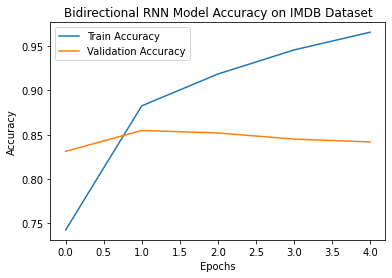

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bidirectional RNN Model Accuracy on IMDB Dataset')
plt.show()

In [6]:
# Function to preprocess and predict sentiment
def predicted_sentiment(text, model):
    tokenizer = Tokenizer(num_words=vocab_size)
    sequence = tokenizer.texts_to_sequences([text])  # Convert text to sequence
    padding_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')  # Pad sequence
    prediction = model.predict(padding_sequence)[0][0]  # Get model prediction
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    print(f"Predicted Sentiment: {sentiment} (score: {prediction:.4f})")
    return sentiment

# Example usage
input_text = "This movie was very bad."
predicted_sentiment(input_text, model)

Predicted Sentiment: Negative (score: 0.3322)


'Negative'

In [7]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build Model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(rnn_units, activation='tanh', 
                      dropout=0.3, recurrent_dropout=0.3, 
                      kernel_regularizer=l2(0.01))),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train with Early Stopping
history = model.fit(x_train, y_train, 
                    epochs=15, batch_size=32, 
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stopping])


Epoch 1/15
782/782 [==============================] - 212s 266ms/step - loss: 0.8177 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
782/782 [==============================] - 276s 353ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
723/782 [==========================>...] - ETA: 15s - loss: 0.6932 - accuracy: 0.4960

KeyboardInterrupt: 